In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
file_path = ".....imdb_top_1000.csv"
df = pd.read_csv(file_path)

In [2]:
df.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
df.describe().T


count          mean            std      min       25%       50%  \
IMDB_Rating  1000.0       7.94930       0.275491      7.6      7.70       7.9   
Meta_score    843.0      77.97153      12.376099     28.0     70.00      79.0   
No_of_Votes  1000.0  273692.91100  327372.703934  25088.0  55526.25  138548.5   

                   75%        max  
IMDB_Rating       8.10        9.3  
Meta_score       87.00      100.0  
No_of_Votes  374161.25  2343110.0

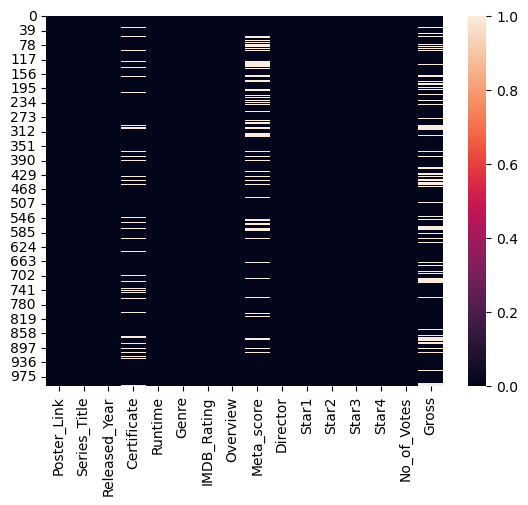

In [5]:
sns.heatmap(df.isnull())
plt.show()

In [6]:
# Fill missing values in 'Certificate' column with the most frequent value
most_frequent_certificate = df['Certificate'].mode()[0]
df['Certificate'].fillna(most_frequent_certificate, inplace=True)

In [7]:
mean_meta_score = df['Meta_score'].mean()
df['Meta_score'].fillna(mean_meta_score, inplace=True)

In [8]:
df.shape

(1000, 16)

In [9]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Poster_Link      False
Series_Title     False
Released_Year    False
Certificate      False
Runtime          False
Genre            False
IMDB_Rating      False
Overview         False
Meta_score       False
Director         False
Star1            False
Star2            False
Star3            False
Star4            False
No_of_Votes      False
Gross             True
dtype: bool

In [10]:
print(df['Gross'].head(10))

0     28,341,469
1    134,966,411
2    534,858,444
3     57,300,000
4      4,360,000
5    377,845,905
6    107,928,762
7     96,898,818
8    292,576,195
9     37,030,102
Name: Gross, dtype: object


In [11]:
gross_mode = df['Gross'].mode()[0]
df['Gross'].fillna(gross_mode, inplace=True)

In [12]:
df['Gross'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Gross
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [13]:
# Convert the 'Gross' column to integer type
df['Gross'] = df['Gross'].replace({'\$': '', ',': ''}, regex=True).astype(int)


In [14]:
print(df['Gross'].dtype)

int32


In [15]:
# Display unique values in the 'Runtime' column
unique_runtimes = df['Runtime'].unique()
print(unique_runtimes)

['142 min' '175 min' '152 min' '202 min' '96 min' '201 min' '154 min'
 '195 min' '148 min' '139 min' '178 min' '161 min' '179 min' '136 min'
 '146 min' '124 min' '133 min' '160 min' '132 min' '153 min' '169 min'
 '130 min' '125 min' '189 min' '116 min' '127 min' '118 min' '121 min'
 '207 min' '122 min' '106 min' '112 min' '151 min' '150 min' '155 min'
 '119 min' '110 min' '88 min' '137 min' '89 min' '165 min' '109 min'
 '102 min' '87 min' '126 min' '147 min' '117 min' '181 min' '149 min'
 '105 min' '164 min' '170 min' '98 min' '101 min' '113 min' '134 min'
 '229 min' '115 min' '143 min' '95 min' '104 min' '123 min' '131 min'
 '108 min' '81 min' '99 min' '114 min' '129 min' '228 min' '128 min'
 '103 min' '107 min' '68 min' '138 min' '156 min' '167 min' '163 min'
 '186 min' '321 min' '135 min' '140 min' '180 min' '158 min' '210 min'
 '86 min' '162 min' '177 min' '204 min' '91 min' '172 min' '45 min'
 '145 min' '100 min' '196 min' '93 min' '120 min' '92 min' '144 min'
 '80 min' '183 min' 

In [16]:
# Remove 'min' and convert the runtime to integer type
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False).astype(int)

In [17]:
print(df['Runtime'].dtype)

int32


In [18]:
df['Released_Year'].unique()
df.shape

(1000, 16)

In [19]:
# Dropping rows where 'Released_Year' is not a numeric value
df = df[pd.to_numeric(df['Released_Year'], errors='coerce').notna()]

In [20]:
df.shape

(999, 16)

In [21]:
df['Released_Year'] = df['Released_Year'].astype(int)

In [22]:
print(df['Released_Year'].dtype)

int32


In [23]:
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes',
       'Gross'],
      dtype='object')


In [24]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['Poster_Link', 'Series_Title', 'Certificate', 'Genre', 'Overview',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4'],
      dtype='object')


In [25]:
df.drop(columns=['Poster_Link', 'Overview'], inplace=True)

In [26]:
print(df.head(10))

                                    Series_Title  Released_Year Certificate  \
0                       The Shawshank Redemption           1994           A   
1                                  The Godfather           1972           A   
2                                The Dark Knight           2008          UA   
3                         The Godfather: Part II           1974           A   
4                                   12 Angry Men           1957           U   
5  The Lord of the Rings: The Return of the King           2003           U   
6                                   Pulp Fiction           1994           A   
7                               Schindler's List           1993           A   
8                                      Inception           2010          UA   
9                                     Fight Club           1999           A   

   Runtime                      Genre  IMDB_Rating  Meta_score  \
0      142                      Drama          9.3        80.0  

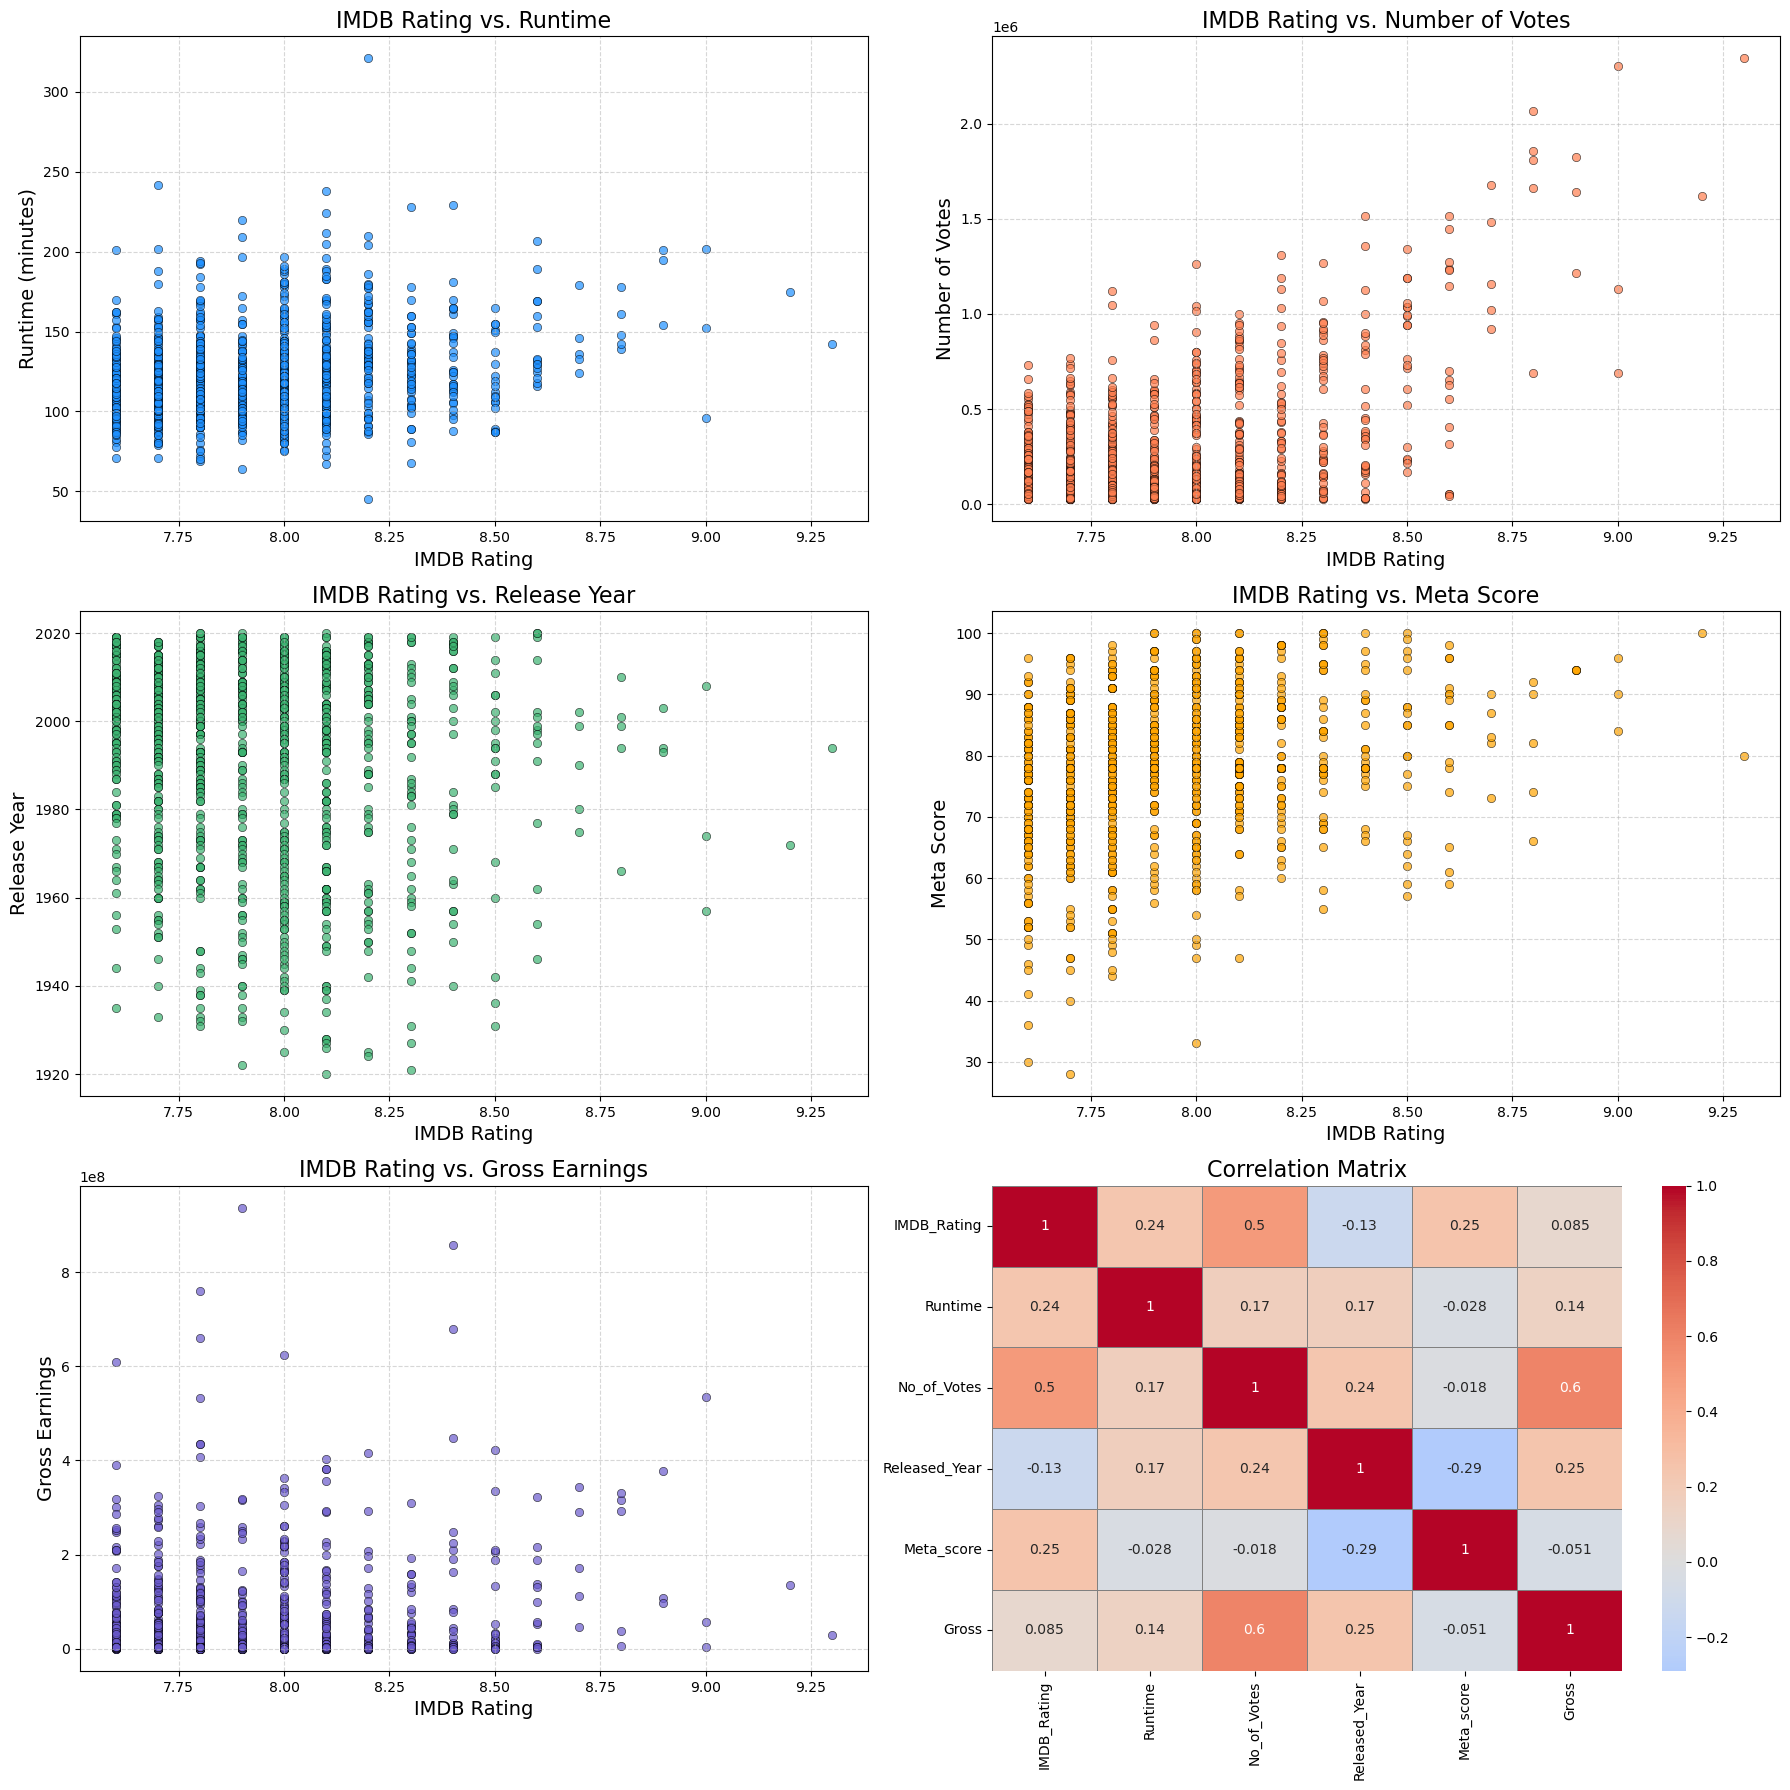

In [27]:
def plot_scatter(ax, x, y, x_label, y_label, title, color, edgecolor='black'):
    sns.scatterplot(x=x, y=y, alpha=0.7, color=color, edgecolor=edgecolor, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)

def plot_correlation_heatmap(ax, df, features):
    correlation_matrix = df[features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax, linewidths=0.5, linecolor='gray')
    ax.set_title('Correlation Matrix', fontsize=16)

def plot_all(df):
    fig, axes = plt.subplots(3, 2, figsize=(18, 18))

    plot_scatter(axes[0, 0], df['IMDB_Rating'], df['Runtime'], 'IMDB Rating', 'Runtime (minutes)', 'IMDB Rating vs. Runtime', 'dodgerblue')
    plot_scatter(axes[0, 1], df['IMDB_Rating'], df['No_of_Votes'], 'IMDB Rating', 'Number of Votes', 'IMDB Rating vs. Number of Votes', 'coral')
    plot_scatter(axes[1, 0], df['IMDB_Rating'], df['Released_Year'], 'IMDB Rating', 'Release Year', 'IMDB Rating vs. Release Year', 'mediumseagreen')
    plot_scatter(axes[1, 1], df['IMDB_Rating'], df['Meta_score'], 'IMDB Rating', 'Meta Score', 'IMDB Rating vs. Meta Score', 'orange')
    plot_scatter(axes[2, 0], df['IMDB_Rating'], df['Gross'], 'IMDB Rating', 'Gross Earnings', 'IMDB Rating vs. Gross Earnings', 'slateblue')

    numeric_features = df[['IMDB_Rating', 'Runtime', 'No_of_Votes', 'Released_Year', 'Meta_score', 'Gross']]
    plot_correlation_heatmap(axes[2, 1], df, numeric_features.columns)

    plt.tight_layout()
    plt.show()

plot_all(df)

In [28]:
yearly_avg_rating = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

In [29]:
yearly_avg_rating = yearly_avg_rating.sort_values('Released_Year')

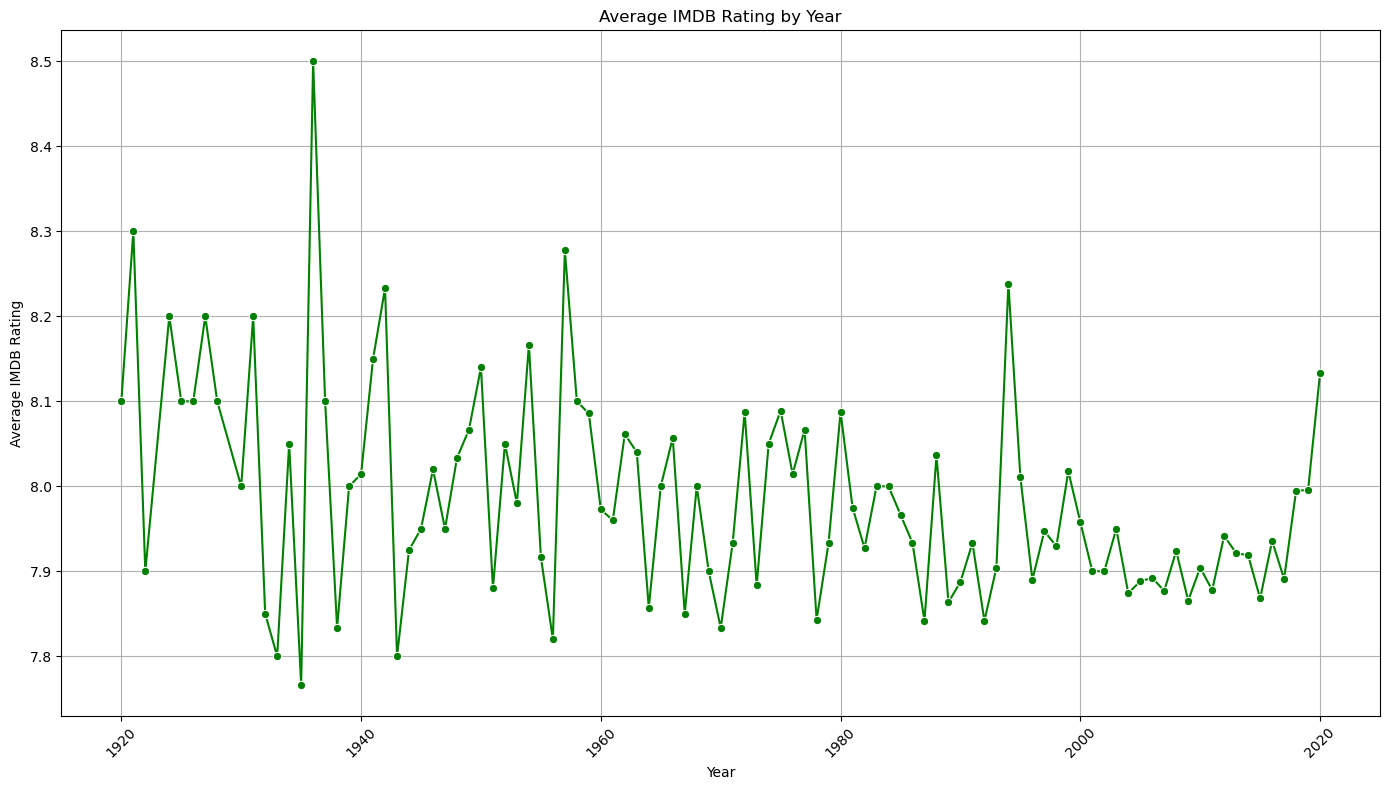

In [30]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Released_Year', y='IMDB_Rating', data=yearly_avg_rating, marker='o', color='g')
plt.title('Average IMDB Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
yearly_avg_gross = df.groupby('Released_Year')['Gross'].mean().reset_index()
yearly_avg_gross = yearly_avg_gross.sort_values('Released_Year')

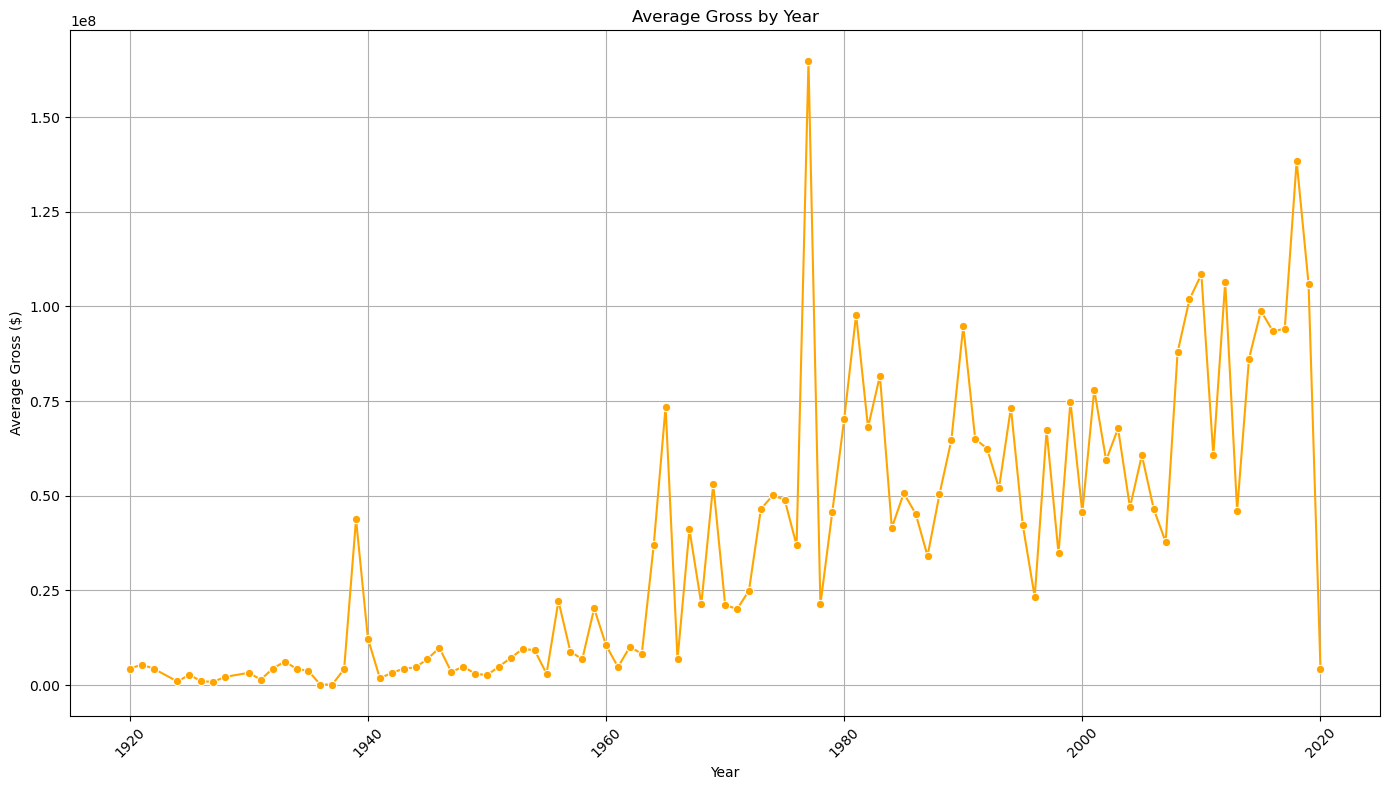

In [32]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Released_Year', y='Gross', data=yearly_avg_gross, marker='o', color='orange')
plt.title('Average Gross by Year')
plt.xlabel('Year')
plt.ylabel('Average Gross ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

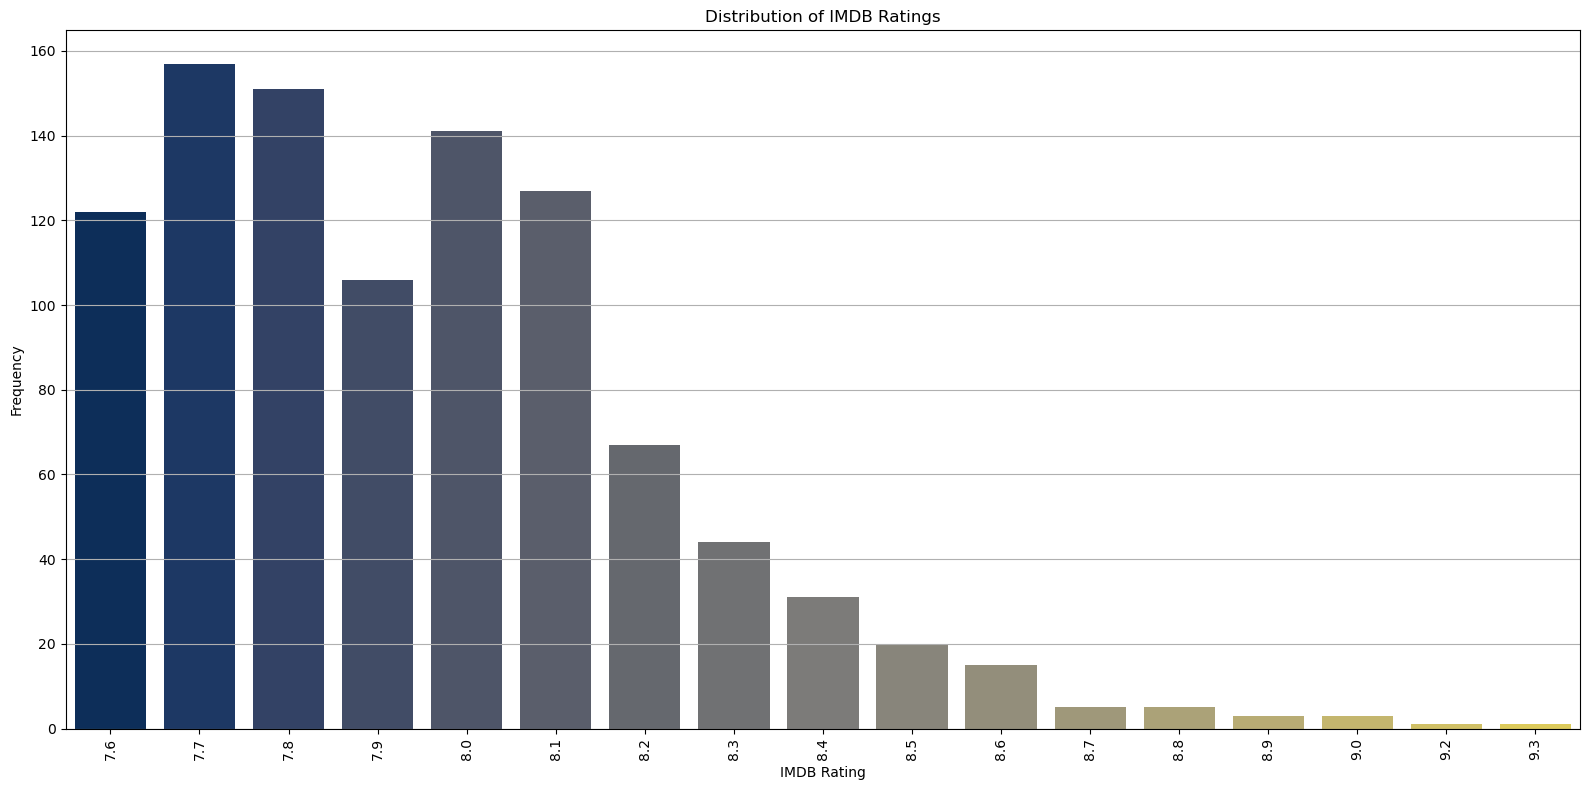

In [33]:
# Calculate the frequency of each IMDB Rating
distribution_rating = df['IMDB_Rating'].value_counts().sort_index()
plt.figure(figsize=(16, 8))
sns.barplot(x=distribution_rating.index, y=distribution_rating.values, palette='cividis')
plt.title("Distribution of IMDB Ratings")
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [34]:
# Define bins for Meta_score ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

In [35]:
# Create a new column 'Meta_score_group' for grouped scores
df['Meta_score_group'] = pd.cut(df['Meta_score'], bins=bins, labels=labels, right=True)
# Calculate the frequency of each Meta_score group
distribution_meta_score = df['Meta_score_group'].value_counts().sort_index()

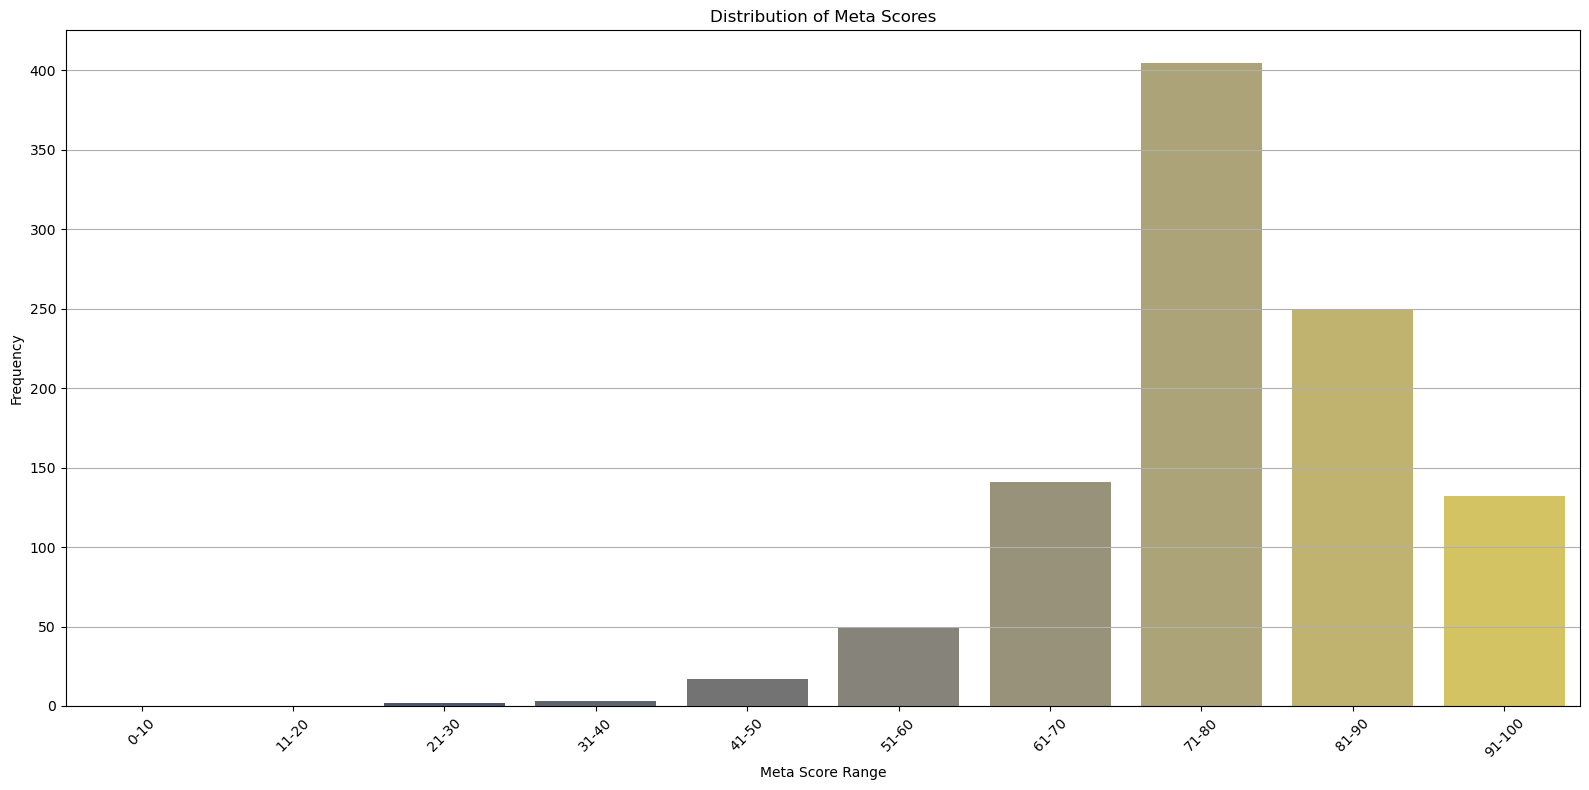

In [36]:
plt.figure(figsize=(16, 8))
sns.barplot(x=distribution_meta_score.index, y=distribution_meta_score.values, palette='cividis')
plt.title("Distribution of Meta Scores")
plt.xlabel('Meta Score Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

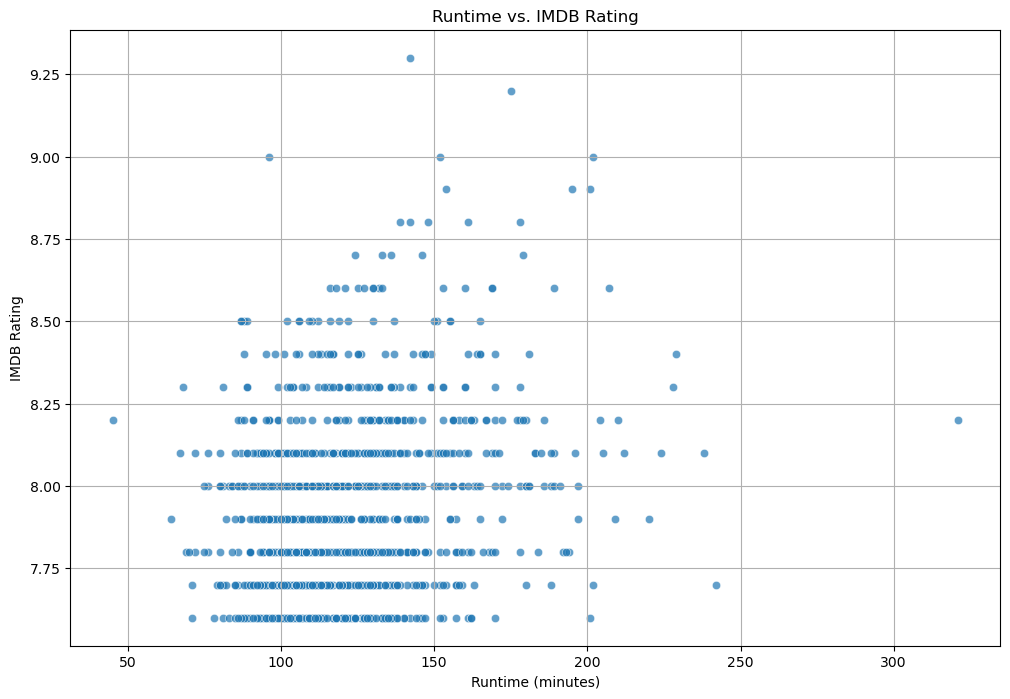

In [37]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x=df['Runtime'], y=df['IMDB_Rating'], palette='cividis', alpha=0.7)

plt.title('Runtime vs. IMDB Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Rating')
plt.grid(True)

plt.show()

In [38]:
average_ratings_per_year = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()
top_10_years = average_ratings_per_year.sort_values(by='IMDB_Rating', ascending=False).head(10)



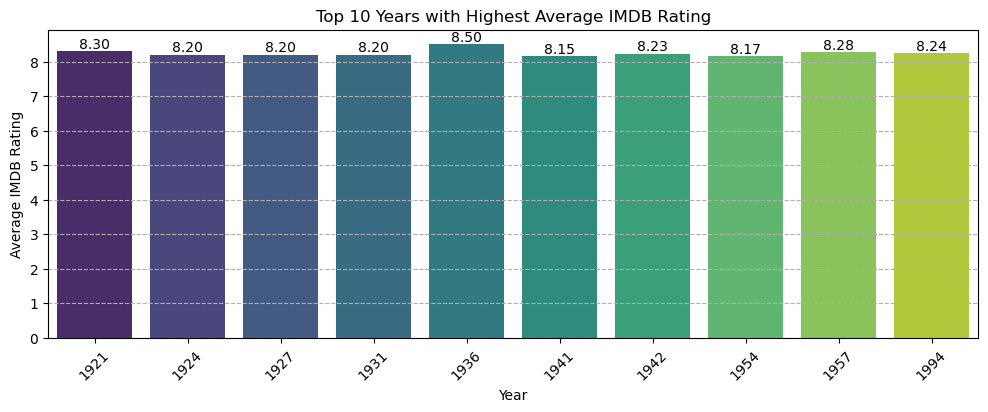

In [39]:
plt.figure(figsize=(12, 4))
barplot = sns.barplot(x=top_10_years['Released_Year'], y=top_10_years['IMDB_Rating'], palette='viridis')
plt.title('Top 10 Years with Highest Average IMDB Rating')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5), 
                     textcoords = 'offset points')

plt.show()

In [40]:
ratings_per_year = df.groupby('Released_Year').agg(
    average_rating=('IMDB_Rating', 'mean'),
    movie_count=('IMDB_Rating', 'size')
).reset_index()
top_10_years = ratings_per_year.sort_values(by='average_rating', ascending=False).head(10)
print("Top 10 Years with Highest Average IMDB Rating and Movie Count:")
print(top_10_years[['Released_Year', 'average_rating', 'movie_count']])

Top 10 Years with Highest Average IMDB Rating and Movie Count:
    Released_Year  average_rating  movie_count
14           1936        8.500000            1
1            1921        8.300000            1
35           1957        8.277778            9
72           1994        8.238462           13
20           1942        8.233333            3
9            1931        8.200000            3
3            1924        8.200000            1
6            1927        8.200000            2
32           1954        8.166667            6
19           1941        8.150000            2


In [41]:
unique_years_counts = df['Released_Year'].value_counts().sort_values(ascending=False)
print("Unique Released Years and Their Counts (sorted in descending order):")
print(unique_years_counts)

Unique Released Years and Their Counts (sorted in descending order):
Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1930     1
1921     1
1936     1
1922     1
1943     1
Name: count, Length: 99, dtype: int64


Top 5 Years with Highest Average IMDB Rating (with at least 5 films):
Released_Year
1957    8.277778
1994    8.238462
1954    8.166667
1950    8.140000
2020    8.133333
Name: IMDB_Rating, dtype: float64


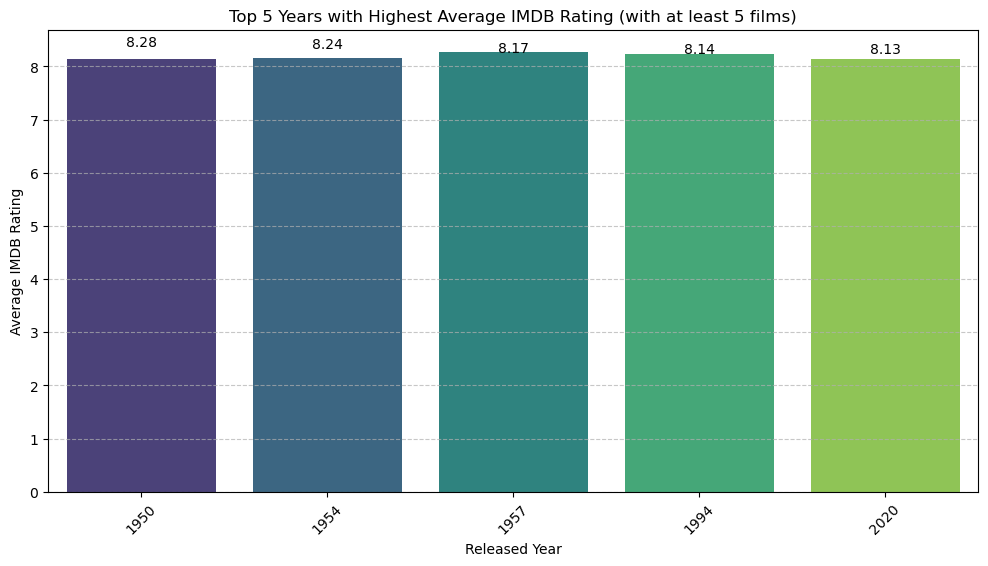

In [42]:
average_rating_per_year = df.groupby('Released_Year')['IMDB_Rating'].mean()

film_counts_per_year = df['Released_Year'].value_counts()

valid_years = film_counts_per_year[film_counts_per_year >= 5].index

filtered_average_rating = average_rating_per_year[average_rating_per_year.index.isin(valid_years)]

top_5_years = filtered_average_rating.nlargest(5)

print("Top 5 Years with Highest Average IMDB Rating (with at least 5 films):")
print(top_5_years)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_years.index, y=top_5_years.values, palette='viridis')
plt.title('Top 5 Years with Highest Average IMDB Rating (with at least 5 films)')
plt.xlabel('Released Year')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(top_5_years):
    plt.text(index, value + 0.05, f'{value:.2f}', ha='center', va='bottom')

plt.show()

Top 5 Years with Highest Average IMDB Rating (with at least 10 films):
Year: 1994, Average Rating: 8.24, Number of Films: 13
Year: 1962, Average Rating: 8.06, Number of Films: 13
Year: 1988, Average Rating: 8.04, Number of Films: 11
Year: 1999, Average Rating: 8.02, Number of Films: 17
Year: 1995, Average Rating: 8.01, Number of Films: 19


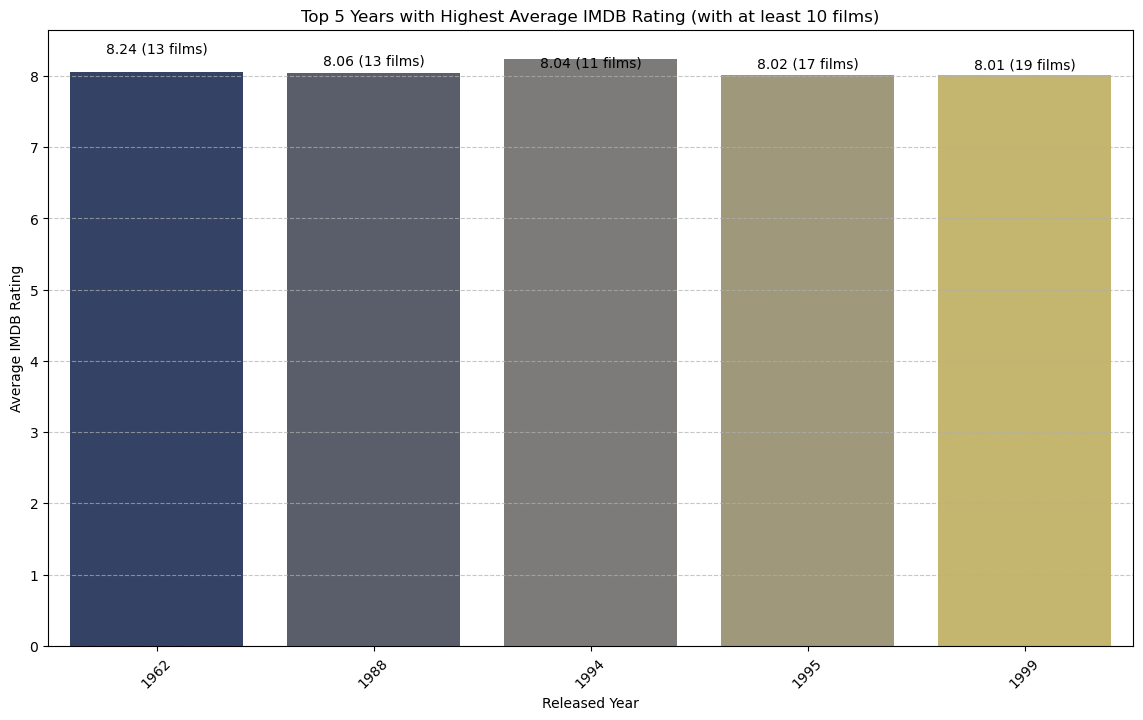

In [43]:
film_counts_per_year = df['Released_Year'].value_counts()
valid_years = film_counts_per_year[film_counts_per_year >= 10].index
filtered_average_rating = average_rating_per_year[average_rating_per_year.index.isin(valid_years)]
top_5_years = filtered_average_rating.nlargest(5)
top_5_film_counts = film_counts_per_year[top_5_years.index]

print("Top 5 Years with Highest Average IMDB Rating (with at least 10 films):")
for year in top_5_years.index:
    print(f"Year: {year}, Average Rating: {top_5_years[year]:.2f}, Number of Films: {top_5_film_counts[year]}")

plt.figure(figsize=(14, 8))
sns.barplot(x=top_5_years.index, y=top_5_years.values, palette='cividis')
plt.title('Top 5 Years with Highest Average IMDB Rating (with at least 10 films)')
plt.xlabel('Released Year')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(top_5_years):
    plt.text(index, value + 0.05, f'{value:.2f} ({top_5_film_counts[top_5_years.index[index]]} films)', 
             ha='center', va='bottom')

plt.show()

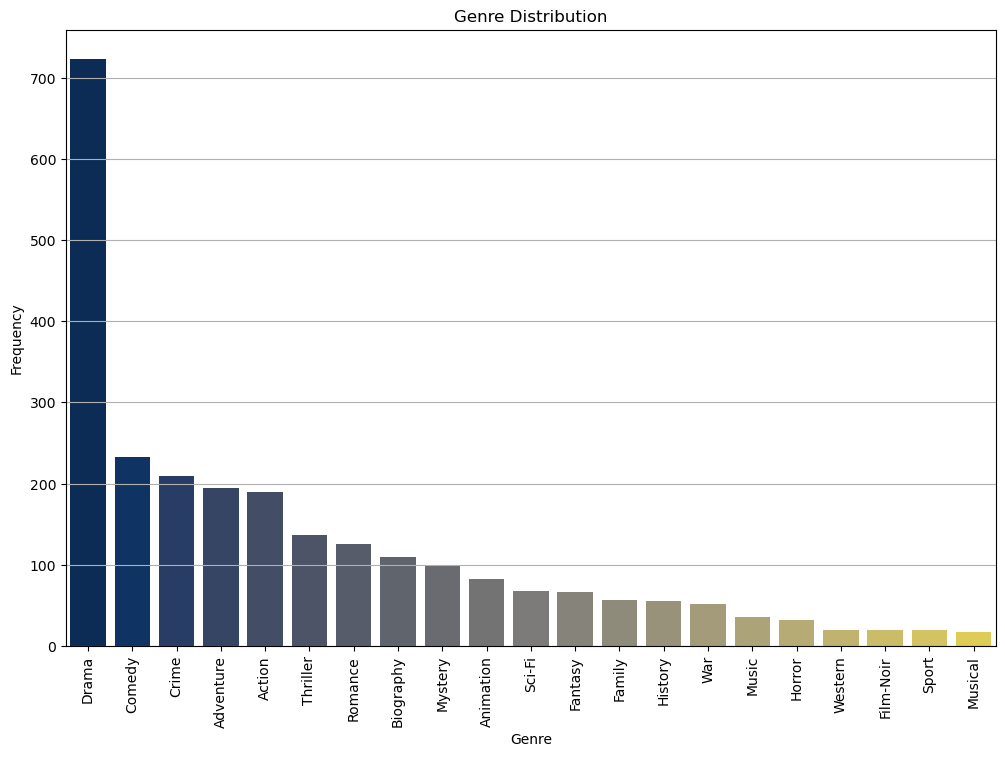

Genre
Drama        723
Comedy       233
Crime        209
Adventure    195
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
Family        56
History       55
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: count, dtype: int64


In [44]:
# Split genres into a list of genres
df['Genre'] = df['Genre'].str.split(', ')
# Explode the list to have one genre per row
df_exploded = df.explode('Genre')
# Count the occurrences of each genre
genre_counts = df_exploded['Genre'].value_counts()


plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='cividis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

print(genre_counts)

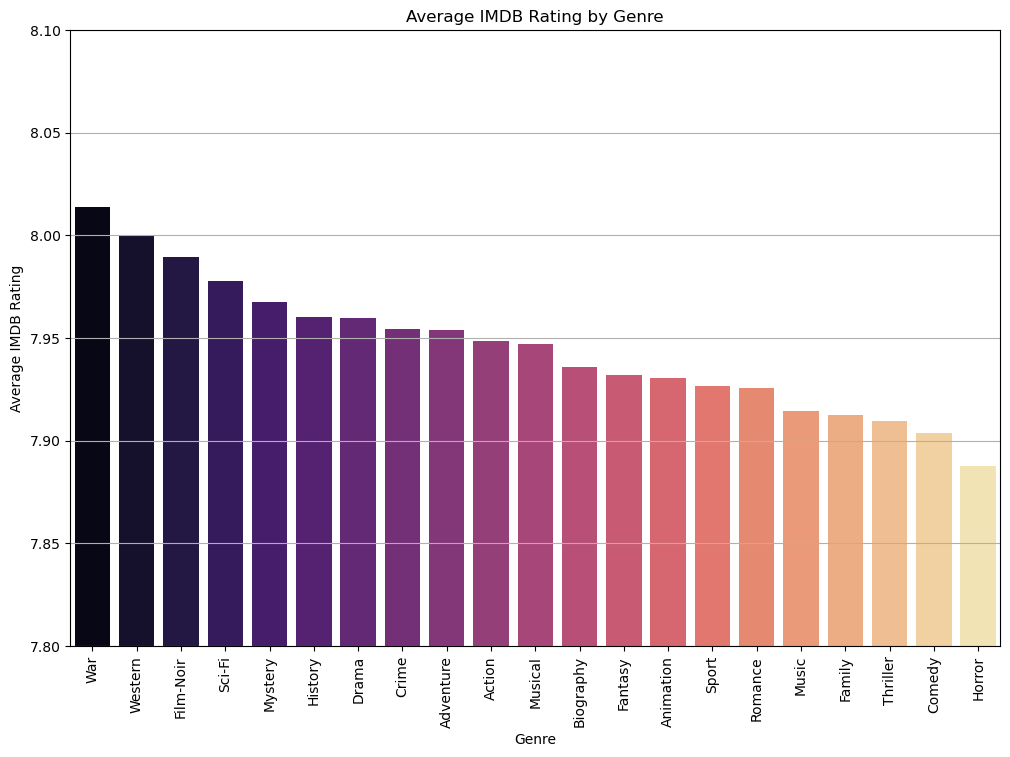

Genre
War          8.013725
Western      8.000000
Film-Noir    7.989474
Sci-Fi       7.977612
Mystery      7.967677
History      7.960000
Drama        7.959889
Crime        7.954545
Adventure    7.953846
Action       7.948677
Musical      7.947059
Biography    7.935780
Fantasy      7.931818
Animation    7.930488
Sport        7.926316
Romance      7.925600
Music        7.914286
Family       7.912500
Thriller     7.909489
Comedy       7.903433
Horror       7.887500
Name: IMDB_Rating, dtype: float64


In [45]:
genre_rating = df_exploded.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='magma')
plt.title('Average IMDB Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=90)
plt.ylim(7.8, 8.1)  
plt.grid(True, axis='y')
plt.show()

print(genre_rating)

In [46]:
director_counts = df['Director'].value_counts().reset_index()
director_counts.columns = ['Director', 'Number of Films']

top_10_directors = director_counts.head(10)

fig = px.bar(top_10_directors, 
             x='Director', 
             y='Number of Films',
             title='Top 10 Directors with the Most Films',
             labels={'Number of Films': 'Number of Films', 'Director': 'Director'},
             color='Number of Films',
             color_continuous_scale='RdBu')  

fig.update_layout(yaxis_title='Number of Films', 
                  xaxis_title='Director',
                  xaxis_tickangle=-45)

fig.show()

In [47]:
director_rating = df.groupby('Director')['IMDB_Rating'].agg(['mean', 'count']).reset_index()
director_rating.columns = ['Director', 'Average_Rating', 'Number_of_Films']

directors_with_min_5_films = director_rating[director_rating['Number_of_Films'] >= 5]

top_10_directors = directors_with_min_5_films.sort_values(by='Average_Rating', ascending=False).head(10)

print(top_10_directors[['Director', 'Average_Rating', 'Number_of_Films']])

                 Director  Average_Rating  Number_of_Films
83      Christopher Nolan        8.462500                8
383         Peter Jackson        8.400000                5
137  Francis Ford Coppola        8.400000                5
74        Charles Chaplin        8.333333                6
449          Sergio Leone        8.266667                6
463       Stanley Kubrick        8.233333                9
9          Akira Kurosawa        8.220000               10
391     Quentin Tarantino        8.175000                8
313       Martin Scorsese        8.170000               10
49           Billy Wilder        8.144444                9


In [48]:
top_5_directors = top_10_directors.head(5)

fig = px.bar(top_5_directors, x='Director', y='Average_Rating',
             text='Average_Rating',
             title='Top 5 Directors with Highest Average IMDB Rating',
             labels={'Director': 'Director', 'Average_Rating': 'Average IMDB Rating'},
             color='Average_Rating',
             color_continuous_scale='viridis')

fig.update_layout(
    xaxis_title='Director',
    yaxis_title='Average IMDB Rating',
    xaxis_tickangle=-45,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    margin=dict(l=50, r=50, t=50, b=150),  
    yaxis=dict(
        range=[0, top_5_directors['Average_Rating'].max() + 1]  
    )
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(height=600)

fig.show()

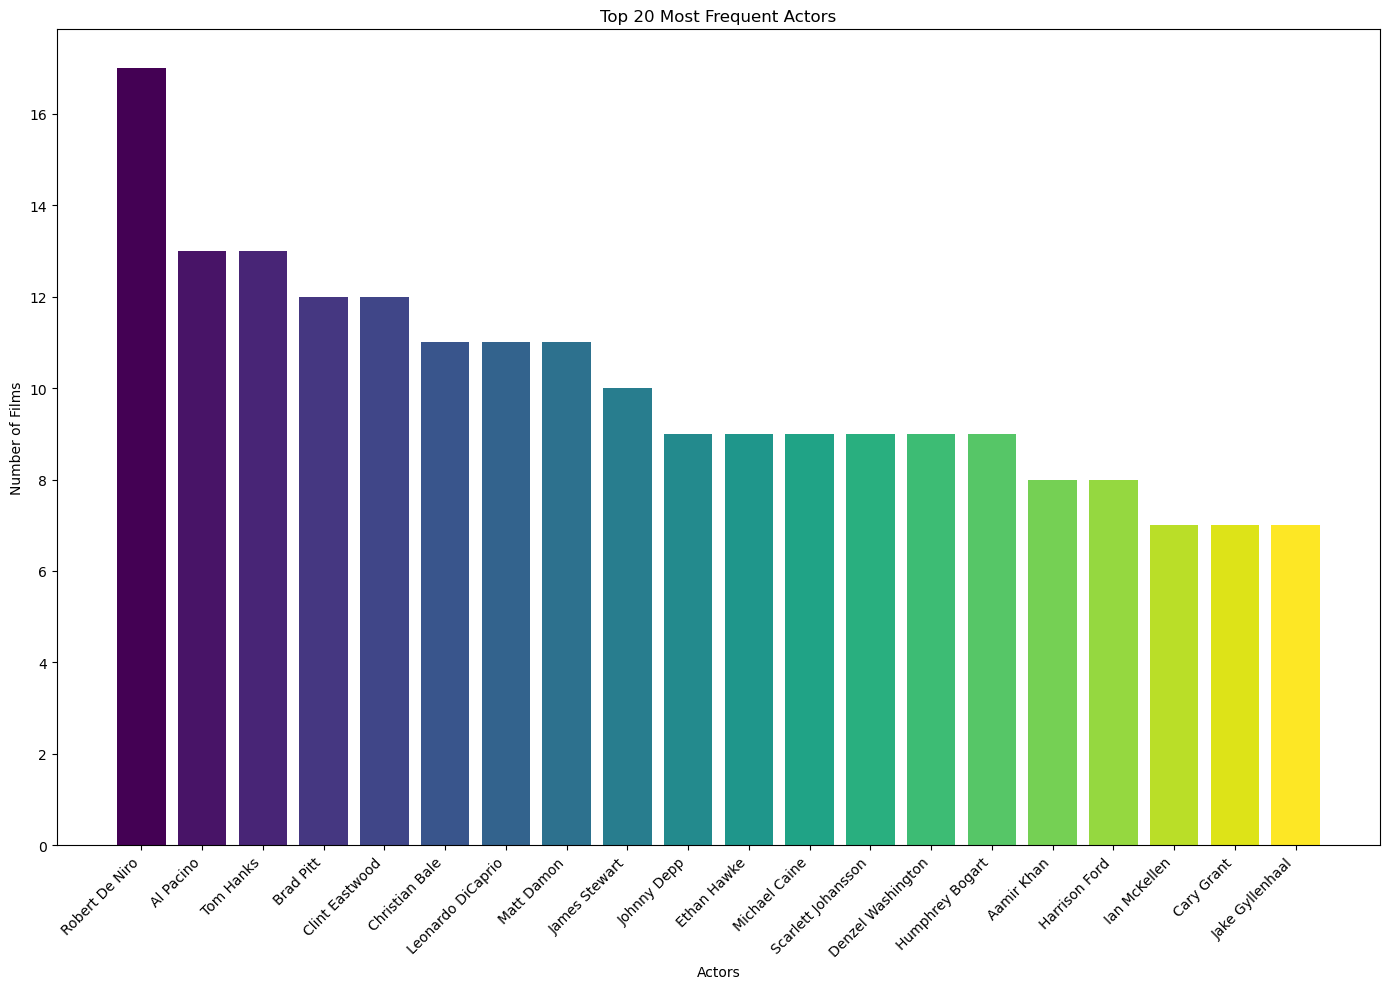

In [49]:
# Combine all star columns into one Series
all_stars = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])

# Count the number of films each actor has appeared in
star_frequencies = all_stars.value_counts()

# Select the top 20 actors with the highest frequency
top_20_stars = star_frequencies.head(20)

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(top_20_stars)))

plt.figure(figsize=(14, 10))  
bars = plt.bar(top_20_stars.index, top_20_stars.values, color=colors) 
plt.title('Top 20 Most Frequent Actors')  
plt.xlabel('Actors')  
plt.ylabel('Number of Films')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()  

In [50]:
# Filter out actors who have appeared in at least 5 films
star_counts = all_stars.value_counts()
frequent_actors = star_counts[star_counts >= 5].index

# Filter the original DataFrame to include only rows with the frequent actors
filtered_df = df[df['Star1'].isin(frequent_actors) | df['Star2'].isin(frequent_actors) |
                  df['Star3'].isin(frequent_actors) | df['Star4'].isin(frequent_actors)]

# Function to calculate the average rating for each actor
def calculate_average_rating(actor, df):
    ratings = []
    for star_column in ['Star1', 'Star2', 'Star3', 'Star4']:
        ratings.extend(df[df[star_column] == actor]['IMDB_Rating'].tolist())  # Updated to 'IMDB_Rating'
    return np.mean(ratings)

# Calculate the average rating for each frequent actor
average_ratings = {actor: calculate_average_rating(actor, filtered_df) for actor in frequent_actors}

# Convert the dictionary to a DataFrame and sort by average rating
average_ratings_df = pd.DataFrame(list(average_ratings.items()), columns=['Actor', 'Average Rating'])
top_10_actors = average_ratings_df.sort_values(by='Average Rating', ascending=False).head(10)


print(top_10_actors)

              Actor  Average Rating
54  Charles Chaplin        8.333333
69     Kevin Spacey        8.300000
16    Harrison Ford        8.262500
58  Viggo Mortensen        8.260000
52  Tatsuya Nakadai        8.250000
23   Toshirô Mifune        8.242857
15       Aamir Khan        8.237500
36     Diane Keaton        8.233333
17     Ian McKellen        8.214286
29   Morgan Freeman        8.185714


In [51]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'Meta_score_group'],
      dtype='object')

In [52]:
fig = px.bar(
    top_10_actors,
    x='Actor',
    y='Average Rating',
    text='Average Rating',  
    title='Top 10 Actors with Highest Average Ratings (at least 5 films)',
    labels={'Average Rating': 'Average Rating', 'Actor': 'Actor'},
    color='Average Rating',  
    color_continuous_scale='Reds'  
)

fig.update_layout(
    xaxis_title='Actor',
    yaxis_title='Average Rating',
    yaxis=dict(range=[8, 8.5]),  
    xaxis_tickangle=-45,  
    xaxis_title_standoff=10  
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

In [53]:

# Group by movie series and calculate the mean IMDB Rating
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean = mean.sort_values("IMDB_Rating", ascending=False).head(20)


fig = px.bar(mean, 
             x=mean["IMDB_Rating"], 
             y=mean.index,
             orientation='h', 
             title='Top 20 Movies by Average IMDB Rating',
             labels={'IMDB_Rating': 'IMDB Rating', 'Series_Title': 'Movie'},
             color=mean["IMDB_Rating"], 
             color_continuous_scale='Reds', 
             text=mean["IMDB_Rating"])


fig.update_layout(
    xaxis_title='IMDB Rating',
    yaxis_title='Movie',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=False, tickmode='array', tickvals=mean.index),
    coloraxis_colorbar=dict(title='IMDB Rating'),
    height=600,  
    yaxis_categoryorder='total ascending'  
)


fig.show()

In [54]:
df.columns


Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'Meta_score_group'],
      dtype='object')

In [55]:
vote_counts = df.groupby('Series_Title')['No_of_Votes'].sum().sort_values(ascending=False)

top_7_movies = vote_counts.head(7)

top_7_movies_df = df[df['Series_Title'].isin(top_7_movies.index)]

top_7_movies_df = top_7_movies_df.drop_duplicates(subset='Series_Title')

top_7_movies_df = top_7_movies_df.set_index('Series_Title').loc[top_7_movies.index].sort_values(by='No_of_Votes', ascending=True)

fig = px.bar(
    top_7_movies_df,
    x='No_of_Votes',
    y=top_7_movies_df.index,
    text='IMDB_Rating',
    color='IMDB_Rating',
    color_continuous_scale='Blues',
    labels={'No_of_Votes': 'Number of Votes', 'IMDB_Rating': 'IMDb Rating'},
    title='Top 7 Most Voted Movies'
)

fig.update_layout(
    xaxis_title='Number of Votes',
    yaxis_title='Movie Title',
    yaxis=dict(tickvals=list(top_7_movies_df.index)),
    xaxis=dict(gridcolor='lightgrey'),
    plot_bgcolor='white'
)

fig.show()

In [56]:

df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')

fig = px.scatter(
    df,
    x='No_of_Votes',
    y='IMDB_Rating',
    color='IMDB_Rating',
    color_continuous_scale='Viridis',
    labels={'No_of_Votes': 'Number of Votes', 'IMDB_Rating': 'IMDb Rating'},
    title='Distribution of IMDb Ratings vs Number of Votes'
)

fig.update_layout(
    xaxis_title='Number of Votes',
    yaxis_title='IMDb Rating',
    xaxis=dict(gridcolor='lightgrey'),
    yaxis=dict(gridcolor='lightgrey'),
    plot_bgcolor='white'
)

fig.show()

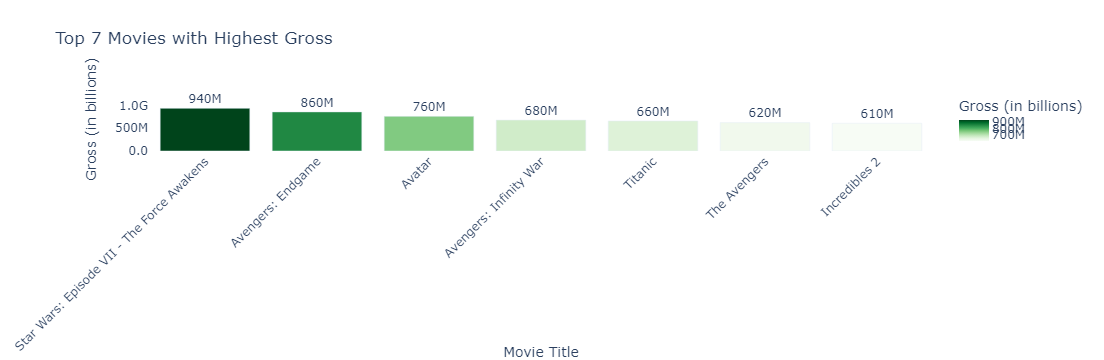

In [57]:
top_7_gross_films = df.sort_values(by='Gross', ascending=False).head(7)

fig = px.bar(
    top_7_gross_films,
    x='Series_Title',
    y='Gross',
    text='Gross',
    title='Top 7 Movies with Highest Gross',
    labels={'Series_Title': 'Movie Title', 'Gross': 'Gross (in billions)'},
    color='Gross',
    color_continuous_scale='Greens'
)

fig.update_layout(
    xaxis_title='Movie Title',
    yaxis_title='Gross (in billions)',
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    yaxis=dict(
        title='Gross (in billions)',
        tickformat=".2s",
        range=[0, top_7_gross_films['Gross'].max() * 1.5] 
    )
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

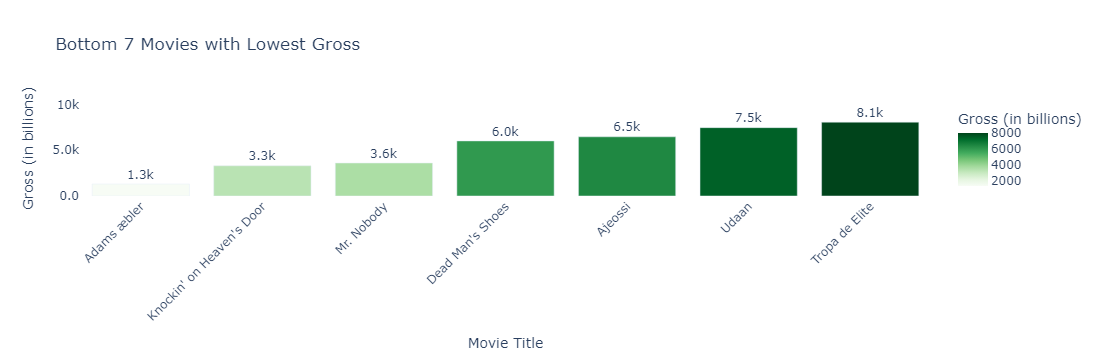

In [58]:
bottom_7_gross_films = df.sort_values(by='Gross').head(7)

fig = px.bar(
    bottom_7_gross_films,
    x='Series_Title',
    y='Gross',
    text='Gross',
    title='Bottom 7 Movies with Lowest Gross',
    labels={'Series_Title': 'Movie Title', 'Gross': 'Gross (in billions)'},
    color='Gross',
    color_continuous_scale='Greens'
)

fig.update_layout(
    xaxis_title='Movie Title',
    yaxis_title='Gross (in billions)',
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    yaxis=dict(
        title='Gross (in billions)',
        tickformat=".2s",
        range=[0, bottom_7_gross_films['Gross'].max() * 1.3]  
    )
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

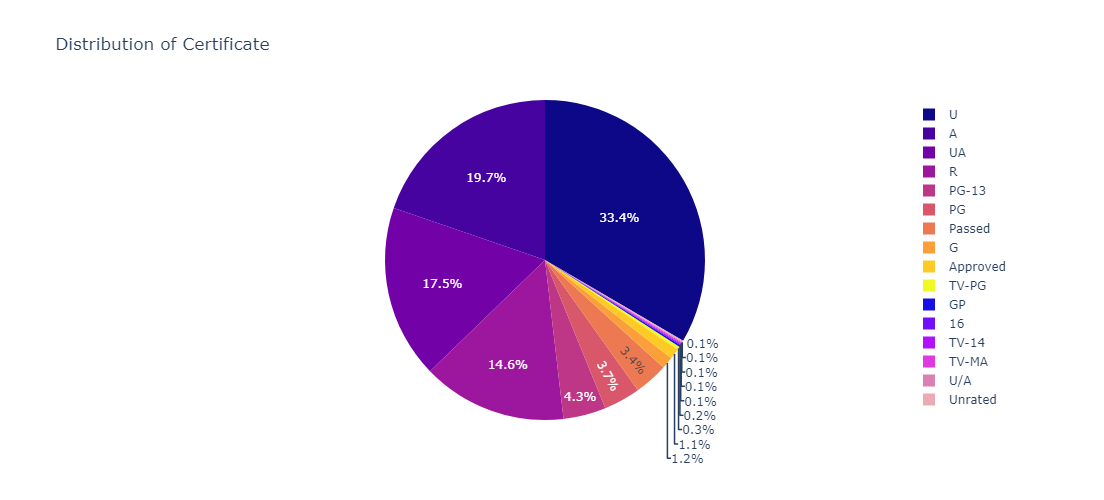

In [59]:
content_type = df.groupby(['Certificate']).size().reset_index(name='counts')

fig = px.pie(content_type, names='Certificate', values='counts',
             color_discrete_sequence=px.colors.sequential.Plasma,  
             title='Distribution of Certificate', height=500, width=700)

fig.show()